# Patikrinami klasterizacijos rezultatai

In [27]:
import pandas

In [28]:
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)
pandas.set_option('precision', 3)

In [29]:
import ggplot as gg

## Patrinamas k vidurkių modelis

In [30]:
kmeansStatistics = pandas.read_csv('models/clustering/kmeans_final/kmeans_statistics_final.csv')

In [31]:
kmeansStatistics

k        SSE
0   1  1.346e+06
1   2  1.170e+06
2   3  1.104e+06
3   4  1.024e+06
4   5  9.700e+05
5   6  9.424e+05
6   7  8.797e+05
7   8  8.579e+05
8   9  8.239e+05
9  10  8.105e+05

In [32]:
kmeansMetrics = pandas.read_csv('models/clustering/kmeans_final/kmeans_metrics_final.csv')

In [33]:
kmeansMetrics

k     fK         Sk
0   2  0.891  1.346e+06
1   3  0.963  1.170e+06
2   4  0.943  1.104e+06
3   5  0.961  1.024e+06
4   6  0.983  9.700e+05
5   7  0.943  9.424e+05
6   8  0.983  8.797e+05
7   9  0.967  8.579e+05
8  10  0.989  8.239e+05

In [48]:
gg.ggplot(gg.aes(x="k", y="Sk"), data=kmeansMetrics) + gg.geom_line() + gg.ylab("Within cluster sum of squared")

<ggplot: (-9223363246960610132)>

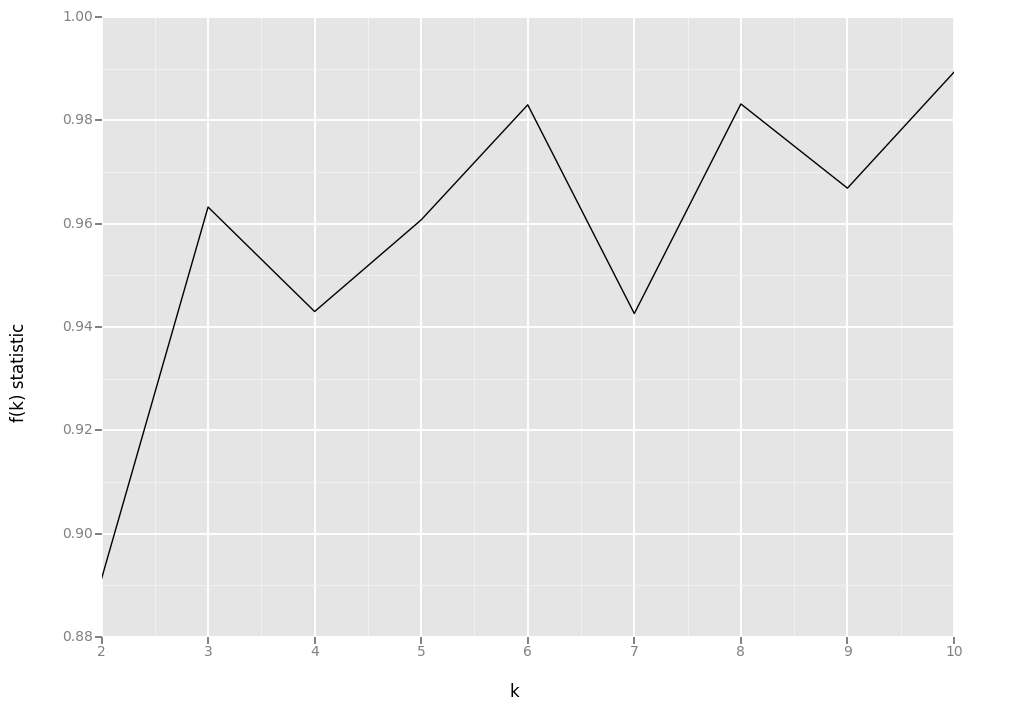

<ggplot: (-9223363301671829823)>

In [34]:
gg.ggplot(gg.aes(x="k", y="fK"), data=kmeansMetrics) + gg.geom_line() + gg.ylab("f(k) statistic")

# Pagal k viurkių modelį, geriausiai atrodo 7 klasteriai, antras geriausias variantas yra 4 klasteriai.

## Patrikrinamas gauso mišinių modelis

In [20]:
gaussianStatistics = pandas.read_csv('models/clustering/gaussian_final/gaussian_statistics_final.csv')

In [35]:
gaussianStatistics

k  logLikelyhood  complexity
0   1     -1.401e+06         527
1   2     -1.041e+06        1055
2   3     -9.186e+05        1583
3   4     -8.974e+05        2111
4   5     -8.147e+05        2639
5   6     -7.535e+05        3167
6   7     -6.707e+05        3695
7   8     -6.814e+05        4223
8   9     -6.543e+05        4751
9  10     -5.988e+05        5279

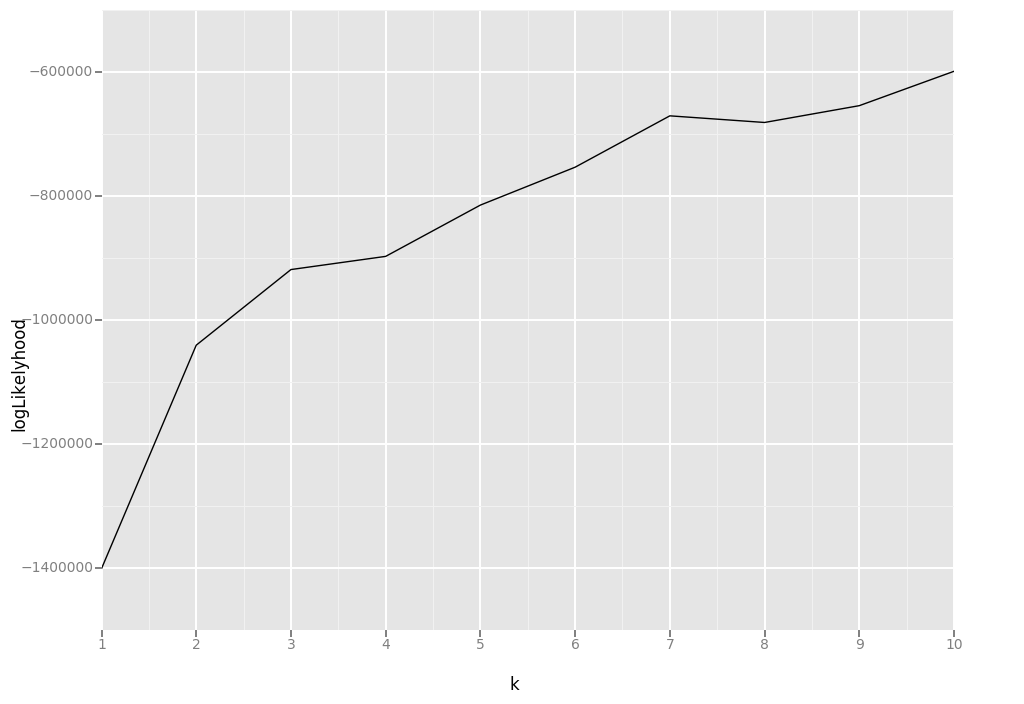

<ggplot: (-9223363301671837657)>

In [36]:
gg.ggplot(gg.aes(x="k", y="logLikelyhood"), data=gaussianStatistics) + gg.geom_line() + gg.ylab("logLikelyhood")

In [37]:
gaussianMetrics = pandas.read_csv('models/clustering/gaussian_final/gaussian_metrics_final.csv')

In [38]:
gaussianMetrics

k        BIC        AIC
0   1  2.803e+06  2.813e+06
1   2  2.083e+06  2.104e+06
2   3  1.841e+06  1.871e+06
3   4  1.799e+06  1.840e+06
4   5  1.635e+06  1.686e+06
5   6  1.514e+06  1.575e+06
6   7  1.350e+06  1.420e+06
7   8  1.372e+06  1.453e+06
8   9  1.319e+06  1.410e+06
9  10  1.210e+06  1.310e+06

In [40]:
gaussianMetrics = pandas.melt(gaussianMetrics, id_vars='k')

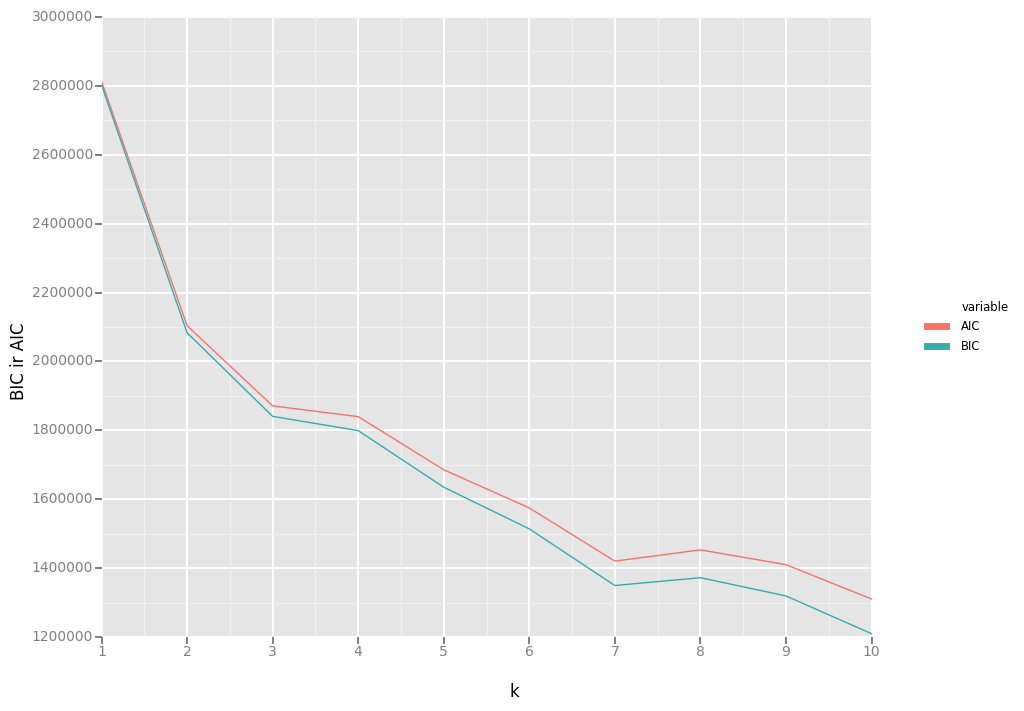

<ggplot: (8735182942735)>

In [41]:
gg.ggplot(gg.aes(x="k", y="value", color='variable'), data=gaussianMetrics) + gg.geom_line() + gg.ylab("BIC ir AIC")

# Pagal gautas statistikas, didejant k didėja klasterizacijos gerumas, bet gerumas lėčiau kinta nuo 7 klasterių, todėl bus šitas skaičius pasirenkamas, nes maksimalus skaičius klasterių būtų ekonomiškai nenaudingas. Pagrinde atsižvelgta į BIC kriterijų, nes suabėjota dėl AIC kriterijaus implementacijos.

Įvertinus abu klasterizacijos modelius, parinkti 7 klasteriai kaip geriausias variantas abiems.